In [1]:
import numpy as np
b = np.random.uniform(2, 3, 1)[0]

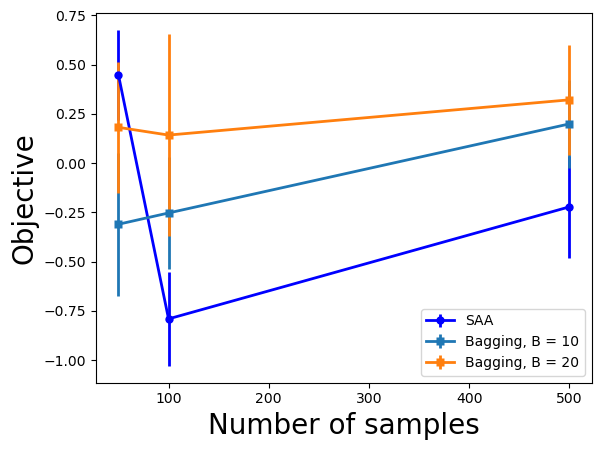

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function definition
def figure_plot_B_CI(SAA_obj_lists, majority_obj_lists_B, sample_number, B_list):
    _, ax = plt.subplots()
    ax.errorbar(sample_number, np.mean(SAA_obj_lists, axis = 1), yerr = stats.sem(SAA_obj_lists, axis = 1), marker = 'o', markeredgecolor = 'none', color = 'blue', linestyle = 'solid', linewidth = 2, label = 'SAA')
    for ind in range(len(majority_obj_lists_B)):
        ax.errorbar(sample_number, np.mean(majority_obj_lists_B[ind], axis = 1), yerr = stats.sem(majority_obj_lists_B[ind], axis = 1), marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'Bagging, B = {B_list[ind]}')
    ax.set_xlabel('Number of samples', size = 20)
    ax.set_ylabel('Objective', size = 20)
    ax.legend(loc = 'lower right')
    plt.show()
    return

# Generating sample data
np.random.seed(42) # For reproducibility

# Assume we have 3 sample sizes and 2 B values for simplicity
sample_number = [50, 100, 500]
B_list = [10, 20]

# Generate random objective values for SAA_obj_lists
SAA_obj_lists = np.random.normal(loc=0, scale=1, size=(3, 10))  # 3 sample sizes, 10 experiments each

# Generate random objective values for majority_obj_lists_B with 2 different B values
majority_obj_lists_B = [
    np.random.normal(loc=0, scale=1, size=(3, 10)),  # B = 10
    np.random.normal(loc=0.2, scale=1.2, size=(3, 10))  # B = 20, slightly different parameters for variety
]

# Call the plotting function with generated samples
figure_plot_B_CI(SAA_obj_lists, majority_obj_lists_B, sample_number, B_list)


In [1]:
from gurobipy import Model, GRB

# Create a new model
model = Model("test_model")

# Create variables
x = model.addVar(name="x", lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS)
y = model.addVar(name="y", lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS)

# Set objective
model.setObjective(2 * x + 3 * y, GRB.MAXIMIZE)

# Add constraint: x + y <= 4
model.addConstr(x + y <= 4, "c0")

# Add constraint: x + 2*y >= 4
model.addConstr(x + 2*y >= 4, "c1")

# Optimize model
model.optimize()

# Print variable values
for v in model.getVars():
    print(f"{v.varName} = {v.x}")

# Print objective value
print(f"Obj: {model.objVal}")


Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.3.0 23D60)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x9ce13b2f
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+00]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.200000000e+01
x = 0.0
y = 4.0
Obj: 12.0


In [5]:
np.random.uniform(2, 3)

2.6208923041817282

In [5]:
import numpy as np

type(0.1*np.ceil(75.3)) == np.float64

True

In [27]:
def sample_func(distribution_name, **dist_params):
   if distribution_name == "sym_pareto":
      a = dist_params.get("a", 2)
      samples = np.random.pareto(a, dist_params["size"])
      samples_copy = np.random.pareto(a, dist_params["size"])
      return samples - samples_copy + a
         
   if hasattr(np.random, distribution_name):
      dist_func = getattr(np.random, distribution_name)
      samples = dist_func(**dist_params)
      return samples + 1 if distribution_name == "pareto" else samples
   else:
      raise ValueError(f"Unsupported distribution: {distribution_name}")

In [18]:
np.random.pareto(1,10)

array([ 1.25189286,  1.15764594,  1.23839497,  0.13499405,  0.43333659,
        1.24783733,  0.82678368, 10.56075104,  0.11385448,  3.08372245])

In [8]:
a_ls = np.random.uniform(2, 3, 10)

In [26]:
np.mean(sample_func("sym_pareto", a=3, size=10000000))

3.0003438917182876

In [1]:
x_count = {1: 0, 2: 3, 3: 5}

In [4]:
sum(x_count[key] for key in x_count.keys())

8

In [17]:
arrays_list = []

for i in range(len(a_ls)):
    arrays_list.append(sample_func("pareto", size=2, a=a_ls[i]))
    sample_n = np.vstack(arrays_list).T

KeyError: -1

In [15]:
sample_n

array([[1.70090754, 2.18842562, 1.15733738, 1.51778965, 3.12520737,
        1.64968622, 1.17465221, 1.02896779, 1.01951291, 1.42872415],
       [1.59016605, 1.23117695, 1.92257239, 1.95430137, 1.22888732,
        1.35207172, 1.15547971, 1.11209308, 1.04731955, 1.05301194]])